<a href="https://colab.research.google.com/github/nikhil697/EDA-On-Tweet-Analysis/blob/main/102103482_NLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Tweet Sentiment Analysis**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
matrix_df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/NLP3/document_term_matrix.pkl')
cleaned_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/NLP3/cleaned_data.pkl')
corpus = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/NLP3/corpus.pkl')

**Top 5 words for each tweet**

In [ ]:
def top_words_in_tweet(row, n=5):
    return row.sort_values(ascending=False).index[:n].tolist()

top_words_per_tweet = matrix_df.apply(top_words_in_tweet, axis=1)
print(top_words_per_tweet)

0          [love, hangin, life, love life, popping]
1                    [ive, going, got, im, ive got]
2                      [uh, huh, rofl, aaron, poor]
3                 [haha thanks, old, haha, lol, im]
4        [hahah, loveeee, aaron, popping, possibly]
                           ...                     
9995      [aaron, prefer, post, possibly, possible]
9996    [love, happy mothers, happy, day, day love]
9997             [day, long, mommies, mothers, man]
9998              [wat, def, new hit, peep, follow]
9999      [thursday, tokyo, japan, visiting, train]
Length: 10000, dtype: object


**Adding Most Common top words to the stoplist**

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
all_top_words = [word for sublist in top_words_per_tweet for word in sublist]

common_words_count = Counter(all_top_words)
common_words = [word for word, count in common_words_count.most_common(10)]
stop_words = set(stopwords.words('english'))
stop_words.update(common_words)

print("Updated Stop Words List:", stop_words)

Updated Stop Words List: {'after', 'some', 'had', 'again', "should've", 'below', 'be', 'more', 'but', "aren't", 'do', 'here', 'we', 'in', 'on', 'yourself', "you're", 'during', 'happy', "wouldn't", 'me', 'im', 'didn', 'don', 'won', 'each', 'wouldn', 'the', 'by', 'mightn', "weren't", 'a', 'been', 's', 'why', 'shouldn', 'most', 'm', 'possibly', 'doing', 'how', "needn't", 'our', 'under', 've', 'just', 'who', 'ours', "you'd", 'of', 'no', 'out', 'his', 'my', "shan't", 'through', 'into', 'shan', 'their', 'once', 'was', 'while', 'her', 'for', 'o', 'as', 'any', 'off', 'if', 'd', "isn't", 'now', 'down', 'should', 'ma', 'possible', 'ain', 'haven', 'popping', 't', 'with', 'aren', "mightn't", 're', 'needn', 'same', 'other', 'myself', 'herself', 'you', 'have', 'will', 'both', 'mothers day', 'doesn', 'so', 'are', 'nor', 'himself', 'them', 'couldn', "haven't", 'being', 'over', 'this', 'against', 'having', 'because', "you've", "you'll", 'up', 'aaron', "won't", "it's", 'him', 'they', "that'll", 'theirs'

**Finding common tweets in which they occur**

In [ ]:
all_routines = [word for sublist in top_words_per_tweet for word in sublist]
filtered_routines = [word for word in all_routines if word not in stop_words]

common_words_count_in_routines = Counter(filtered_routines)
for word, count in common_words_count_in_routines.most_common(10):
    print(f"{word}: {count} occurrences in tweets")

popped: 459 occurrences in tweets
love: 445 occurrences in tweets
popular: 426 occurrences in tweets
post like: 414 occurrences in tweets
good: 412 occurrences in tweets
happy mothers: 395 occurrences in tweets
thanks: 311 occurrences in tweets
lol: 259 occurrences in tweets
like: 255 occurrences in tweets
night: 254 occurrences in tweets


**Removing if it occurs in more than 50% of the tweets**

In [ ]:
# total_tweets = len(top_words_per_tweet)

# word_count = Counter(all_top_words)

# filtered_top_words = [word for word, count in word_count.items() if count <= total_tweets / 2]

# stop_words = set(stopwords.words('english'))
# stop_words.update(filtered_top_words)

# all_top_words_per_tweet = [word for sublist in top_words_per_tweet for word in sublist]

# filtered_routines = [word for word in all_top_words_per_tweet if word not in stop_words]

# common_words_count_in_routines = Counter(filtered_routines)

# for word, count in common_words_count_in_routines.most_common(10):
#     print(f"{word}: {count} occurrences in routines")

**Updated DTM**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_cv_updated = vectorizer.fit_transform(cleaned_data['content'])


vectorizer.stop_words = stop_words

data_cv_updated = vectorizer.transform(cleaned_data['content'])

dtm_updated = pd.DataFrame(data_cv_updated.toarray(), columns=vectorizer.get_feature_names_out())
dtm_updated.index = cleaned_data.index

dtm_updated.to_pickle("dtm_updated.pkl")


**Creating Word Cloud**

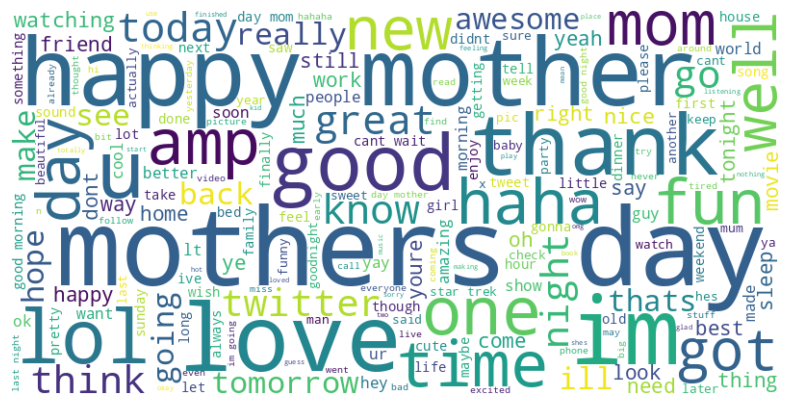

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(cleaned_data['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


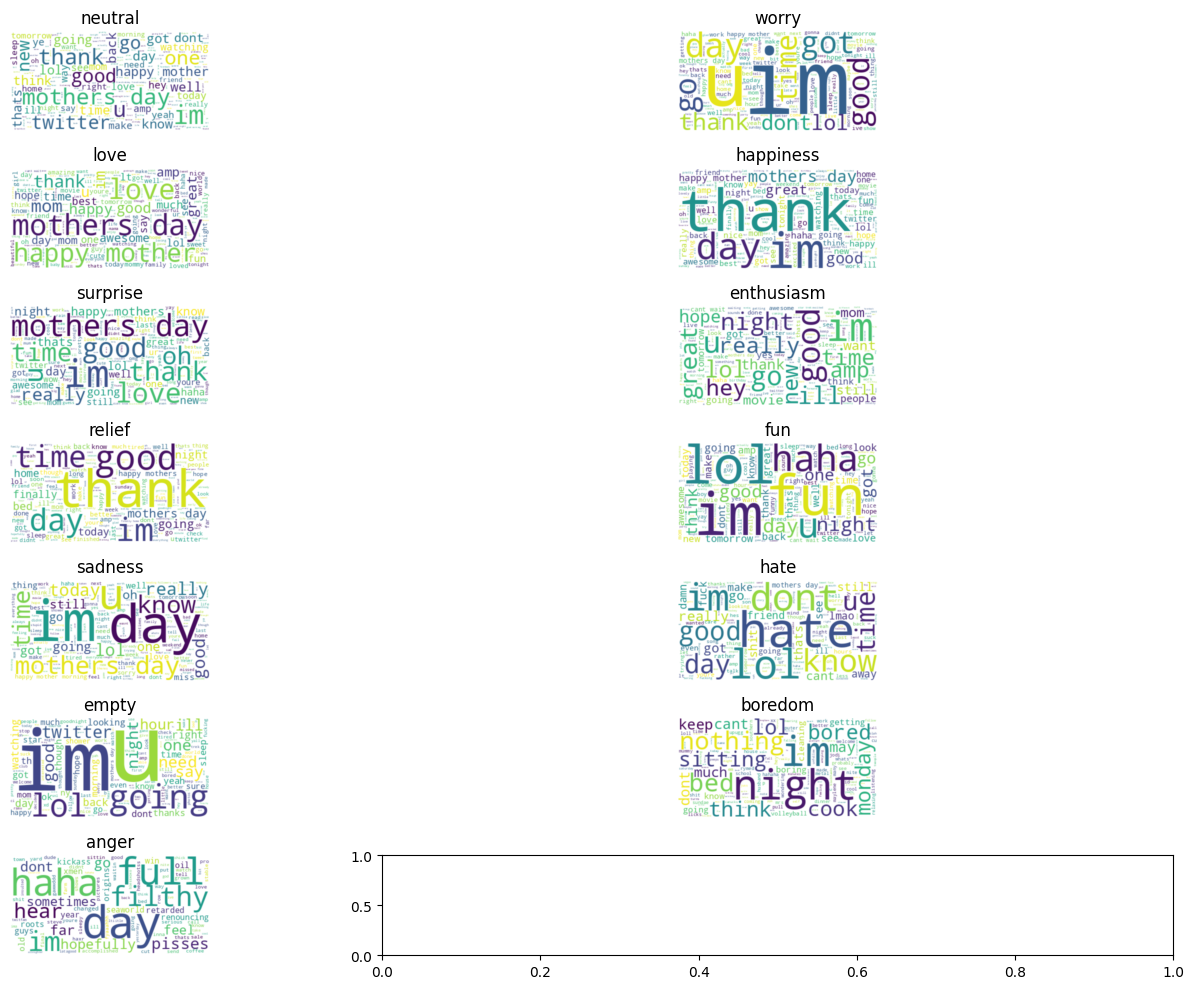

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
unique_sentiments = cleaned_data['sentiment'].unique()

num_cols = 2
num_rows = len(unique_sentiments) // num_cols + (len(unique_sentiments) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, sentiment in enumerate(unique_sentiments):
    subset_data = cleaned_data[cleaned_data['sentiment'] == sentiment]
    text = ' '.join(subset_data['content'])

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(sentiment)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **Assignment 2**

In [ ]:
unique_words_per_tweet = dtm_updated.apply(lambda row: len(row[row > 0]), axis=1)
unique_word_count_df = pd.DataFrame({'Tweet Index': dtm_updated.index, 'Unique Word Count': unique_words_per_tweet})

print(unique_word_count_df)


      Tweet Index  Unique Word Count
0               0                  5
1               1                  9
2               2                  3
3               3                  8
4               4                  3
...           ...                ...
9995         9995                  0
9996         9996                  1
9997         9997                  7
9998         9998                 11
9999         9999                 11

[10000 rows x 2 columns]


In [ ]:
cleaned_data['total_words'] = cleaned_data['content'].apply(lambda x: len(x.split()))
cleaned_data['run_times'] = 1

sentiment_stats = cleaned_data.groupby('sentiment').agg({
    'total_words': 'sum',
    'run_times': 'sum'
})

sentiment_stats['words_per_tweet'] = sentiment_stats['total_words'] / sentiment_stats['run_times']

sentiment_stats_sorted = sentiment_stats.sort_values(by='words_per_tweet', ascending=False)

print(sentiment_stats_sorted)




            total_words  run_times  words_per_tweet
sentiment                                          
sadness            2843        337         8.436202
anger               101         12         8.416667
boredom             175         22         7.954545
fun                5436        688         7.901163
hate               1057        136         7.772059
worry              7700       1026         7.504873
happiness         16350       2223         7.354926
relief             3686        505         7.299010
love              12767       1774         7.196731
surprise           4062        574         7.076655
enthusiasm         1600        237         6.751055
empty               996        168         5.928571
neutral           13160       2298         5.726719


**Plot**

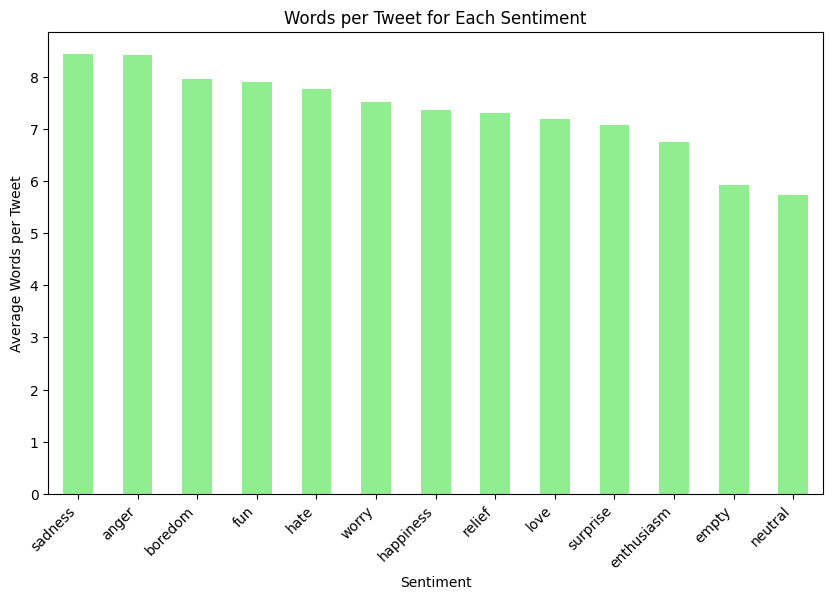

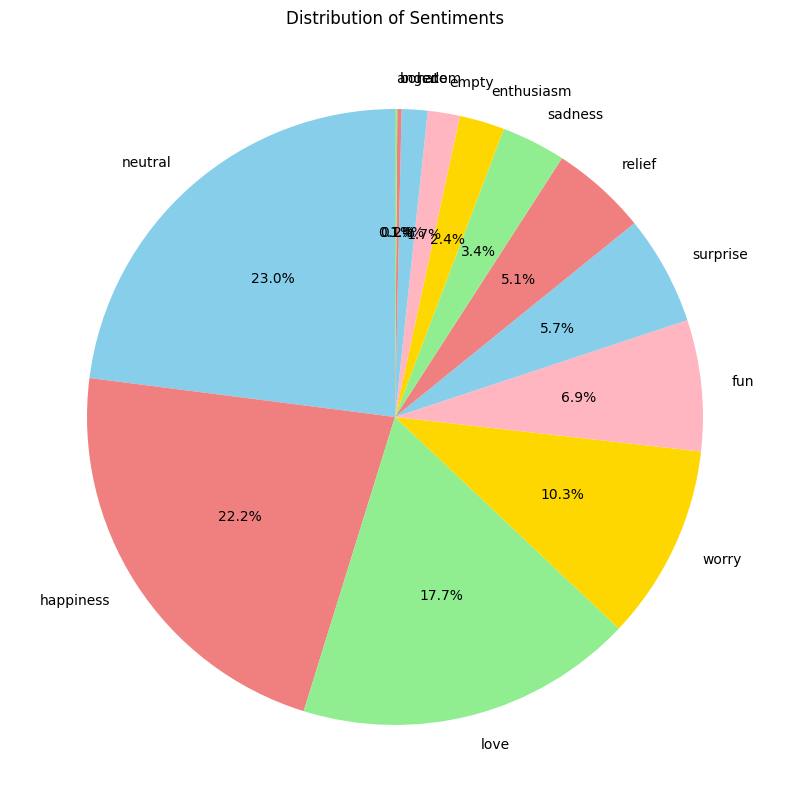

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart for words per tweet
plt.figure(figsize=(10, 6))
sentiment_stats_sorted['words_per_tweet'].plot(kind='bar', color='lightgreen')
plt.title('Words per Tweet for Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Words per Tweet')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

plt.figure(figsize=(10,10))
cleaned_data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])
plt.title('Distribution of Sentiments')
plt.ylabel('')
plt.show()



# **Assignment 3**

No of occurrences of 'fucking': 23
No of occurrences of 'fuck': 21
No of occurrences of 'shit': 28
No of occurrences of 'ass': 27
No of occurrences of 'bitch': 8
No of occurrences of 'damn': 40
No of occurrences of 'hell': 16
No of occurrences of 'asshole': 1
No of occurrences of 'crap': 10


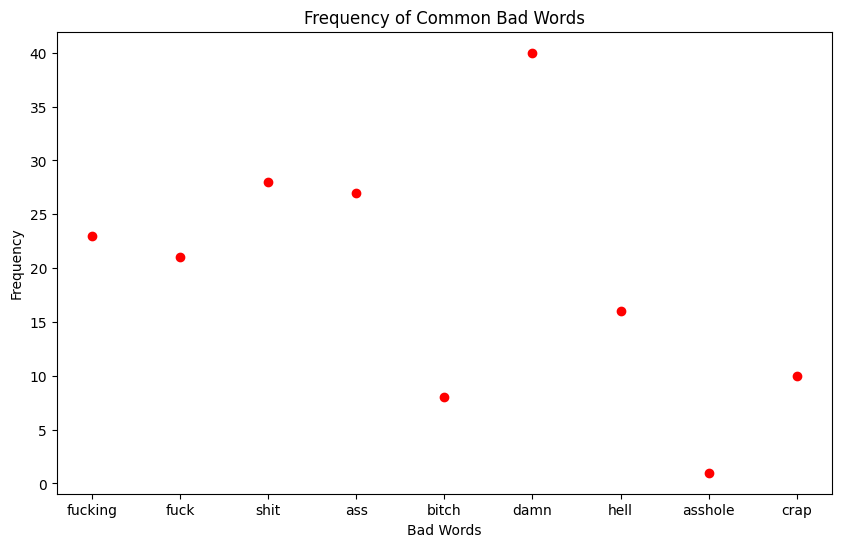

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
data_cv = vectorizer.fit_transform(cleaned_data['content'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vectorizer.get_feature_names_out())

common_words = data_dtm.sum().sort_values(ascending=False)

bad_words = ['fucking', 'fuck', 'shit', 'ass', 'bitch', 'damn', 'hell', 'asshole', 'crap']

bad_words_count = data_dtm[bad_words].sum()

for word, count in bad_words_count.items():
    print(f"No of occurrences of '{word}': {count}")

plt.figure(figsize=(10, 6))
plt.scatter(bad_words, bad_words_count, color='red')
plt.title('Frequency of Common Bad Words')
plt.xlabel('Bad Words')
plt.ylabel('Frequency')
plt.show()


**Findings**

In [ ]:
max_bad_words_indices = data_dtm[bad_words].sum(axis=1).nlargest(2).index
print("Tweets with bad words are \n")
for index in max_bad_words_indices:
    print(cleaned_data.loc[index, 'content'])
    print("=" * 50)


Tweets with bad words are 

fuck fuck fuck fuck please comment back ily
ha damn im ready fuck bitch cant believe balls call haha wtf
